# Import

In [1]:
import lab
import lab.plot
import lab.data
import lab.mmath as mmath
import lab.utils as utils
import lab.arr as arr
import lab.linfit as lf
import lab.constants as const
import lab.utils as utils
from lab.unit import unit as u
from uncertainties import ufloat
import matplotlib.pyplot as plt
print("Import done!")

Import done!


# Read data

In [2]:
data = lab.data.Data("../data/data.csv")
data.head(5)

,T,h1,h2
0,293.00+/-0.05 kelvin,5.1900+/-0.0025 centimeter,2.5800+/-0.0025 centimeter
1,295.00+/-0.05 kelvin,5.3000+/-0.0025 centimeter,2.5000+/-0.0025 centimeter
2,296.00+/-0.05 kelvin,5.3450+/-0.0025 centimeter,2.4400+/-0.0025 centimeter
3,297.00+/-0.05 kelvin,5.4200+/-0.0025 centimeter,2.3600+/-0.0025 centimeter
4,298.00+/-0.05 kelvin,5.5000+/-0.0025 centimeter,2.2950+/-0.0025 centimeter


# Texify primary data

In [3]:
utils.totex(data)

\begin{tabular}{|l|l|l|}
\hline
$T,\;\text{К}$ & $h1,\;\text{см}$ & $h2,\;\text{см}$\\\hline
$293{,}00\pm0{,}05$ & $5{,}1900\pm0{,}0025$ & $2{,}5800\pm0{,}0025$\\\hline
$295{,}00\pm0{,}05$ & $5{,}3000\pm0{,}0025$ & $2{,}5000\pm0{,}0025$\\\hline
$296{,}00\pm0{,}05$ & $5{,}3450\pm0{,}0025$ & $2{,}4400\pm0{,}0025$\\\hline
$297{,}00\pm0{,}05$ & $5{,}4200\pm0{,}0025$ & $2{,}3600\pm0{,}0025$\\\hline
$298{,}00\pm0{,}05$ & $5{,}5000\pm0{,}0025$ & $2{,}2950\pm0{,}0025$\\\hline
$299{,}00\pm0{,}05$ & $5{,}5500\pm0{,}0025$ & $2{,}3400\pm0{,}0025$\\\hline
$300{,}00\pm0{,}05$ & $5{,}6450\pm0{,}0025$ & $2{,}1850\pm0{,}0025$\\\hline
$301{,}00\pm0{,}05$ & $5{,}7100\pm0{,}0025$ & $2{,}1100\pm0{,}0025$\\\hline
$302{,}00\pm0{,}05$ & $5{,}6950\pm0{,}0025$ & $2{,}0200\pm0{,}0025$\\\hline
$303{,}00\pm0{,}05$ & $5{,}8800\pm0{,}0025$ & $1{,}9550\pm0{,}0025$\\\hline
$304{,}00\pm0{,}05$ & $5{,}9400\pm0{,}0025$ & $1{,}8800\pm0{,}0025$\\\hline
$305{,}00\pm0{,}05$ & $6{,}0200\pm0{,}0025$ & $1{,}8100\pm0{,}0025$\\\h

# Add values

In [4]:
r_hg = ufloat(13550, 1) * u.kg / u.m ** 3
r_w = ufloat(1000, 1) * u.kg / u.m ** 3
g = ufloat(9.8154, 1e-4) * u.m / u.s ** 2
dh = ufloat(8.4, 0.0025) * u.cm
r_hg, r_w, g, dh

(13550.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 1000.0+/-1.0 <Unit('kilogram / meter ** 3')>,
 9.8154+/-0.0001 <Unit('meter / second ** 2')>,
 8.4+/-0.0025 <Unit('centimeter')>)

# Compute

In [5]:
data["p"] = ((data["h1"] - data["h2"]) * r_hg * g - r_w * g * dh).ito(u.Pa)
data["1/T"] = data["T"] ** -1
data["lnp"] = mmath.log(data["p"].m)
data.df.head(5)

,T,h1,h2,p,1/T,lnp
0,293.00+/-0.05 kelvin,5.1900+/-0.0025 centimeter,2.5800+/-0.0025 centimeter,2647+/-5 pascal,0.0034130+/-0.0000006 / kelvin,7.8811+/-0.0018 dimensionless
1,295.00+/-0.05 kelvin,5.3000+/-0.0025 centimeter,2.5000+/-0.0025 centimeter,2899+/-5 pascal,0.0033898+/-0.0000006 / kelvin,7.9723+/-0.0017 dimensionless
2,296.00+/-0.05 kelvin,5.3450+/-0.0025 centimeter,2.4400+/-0.0025 centimeter,3039+/-5 pascal,0.0033784+/-0.0000006 / kelvin,8.0193+/-0.0016 dimensionless
3,297.00+/-0.05 kelvin,5.4200+/-0.0025 centimeter,2.3600+/-0.0025 centimeter,3245+/-5 pascal,0.0033670+/-0.0000006 / kelvin,8.0850+/-0.0015 dimensionless
4,298.00+/-0.05 kelvin,5.5000+/-0.0025 centimeter,2.2950+/-0.0025 centimeter,3438+/-5 pascal,0.0033557+/-0.0000006 / kelvin,8.1427+/-0.0014 dimensionless


# Plot

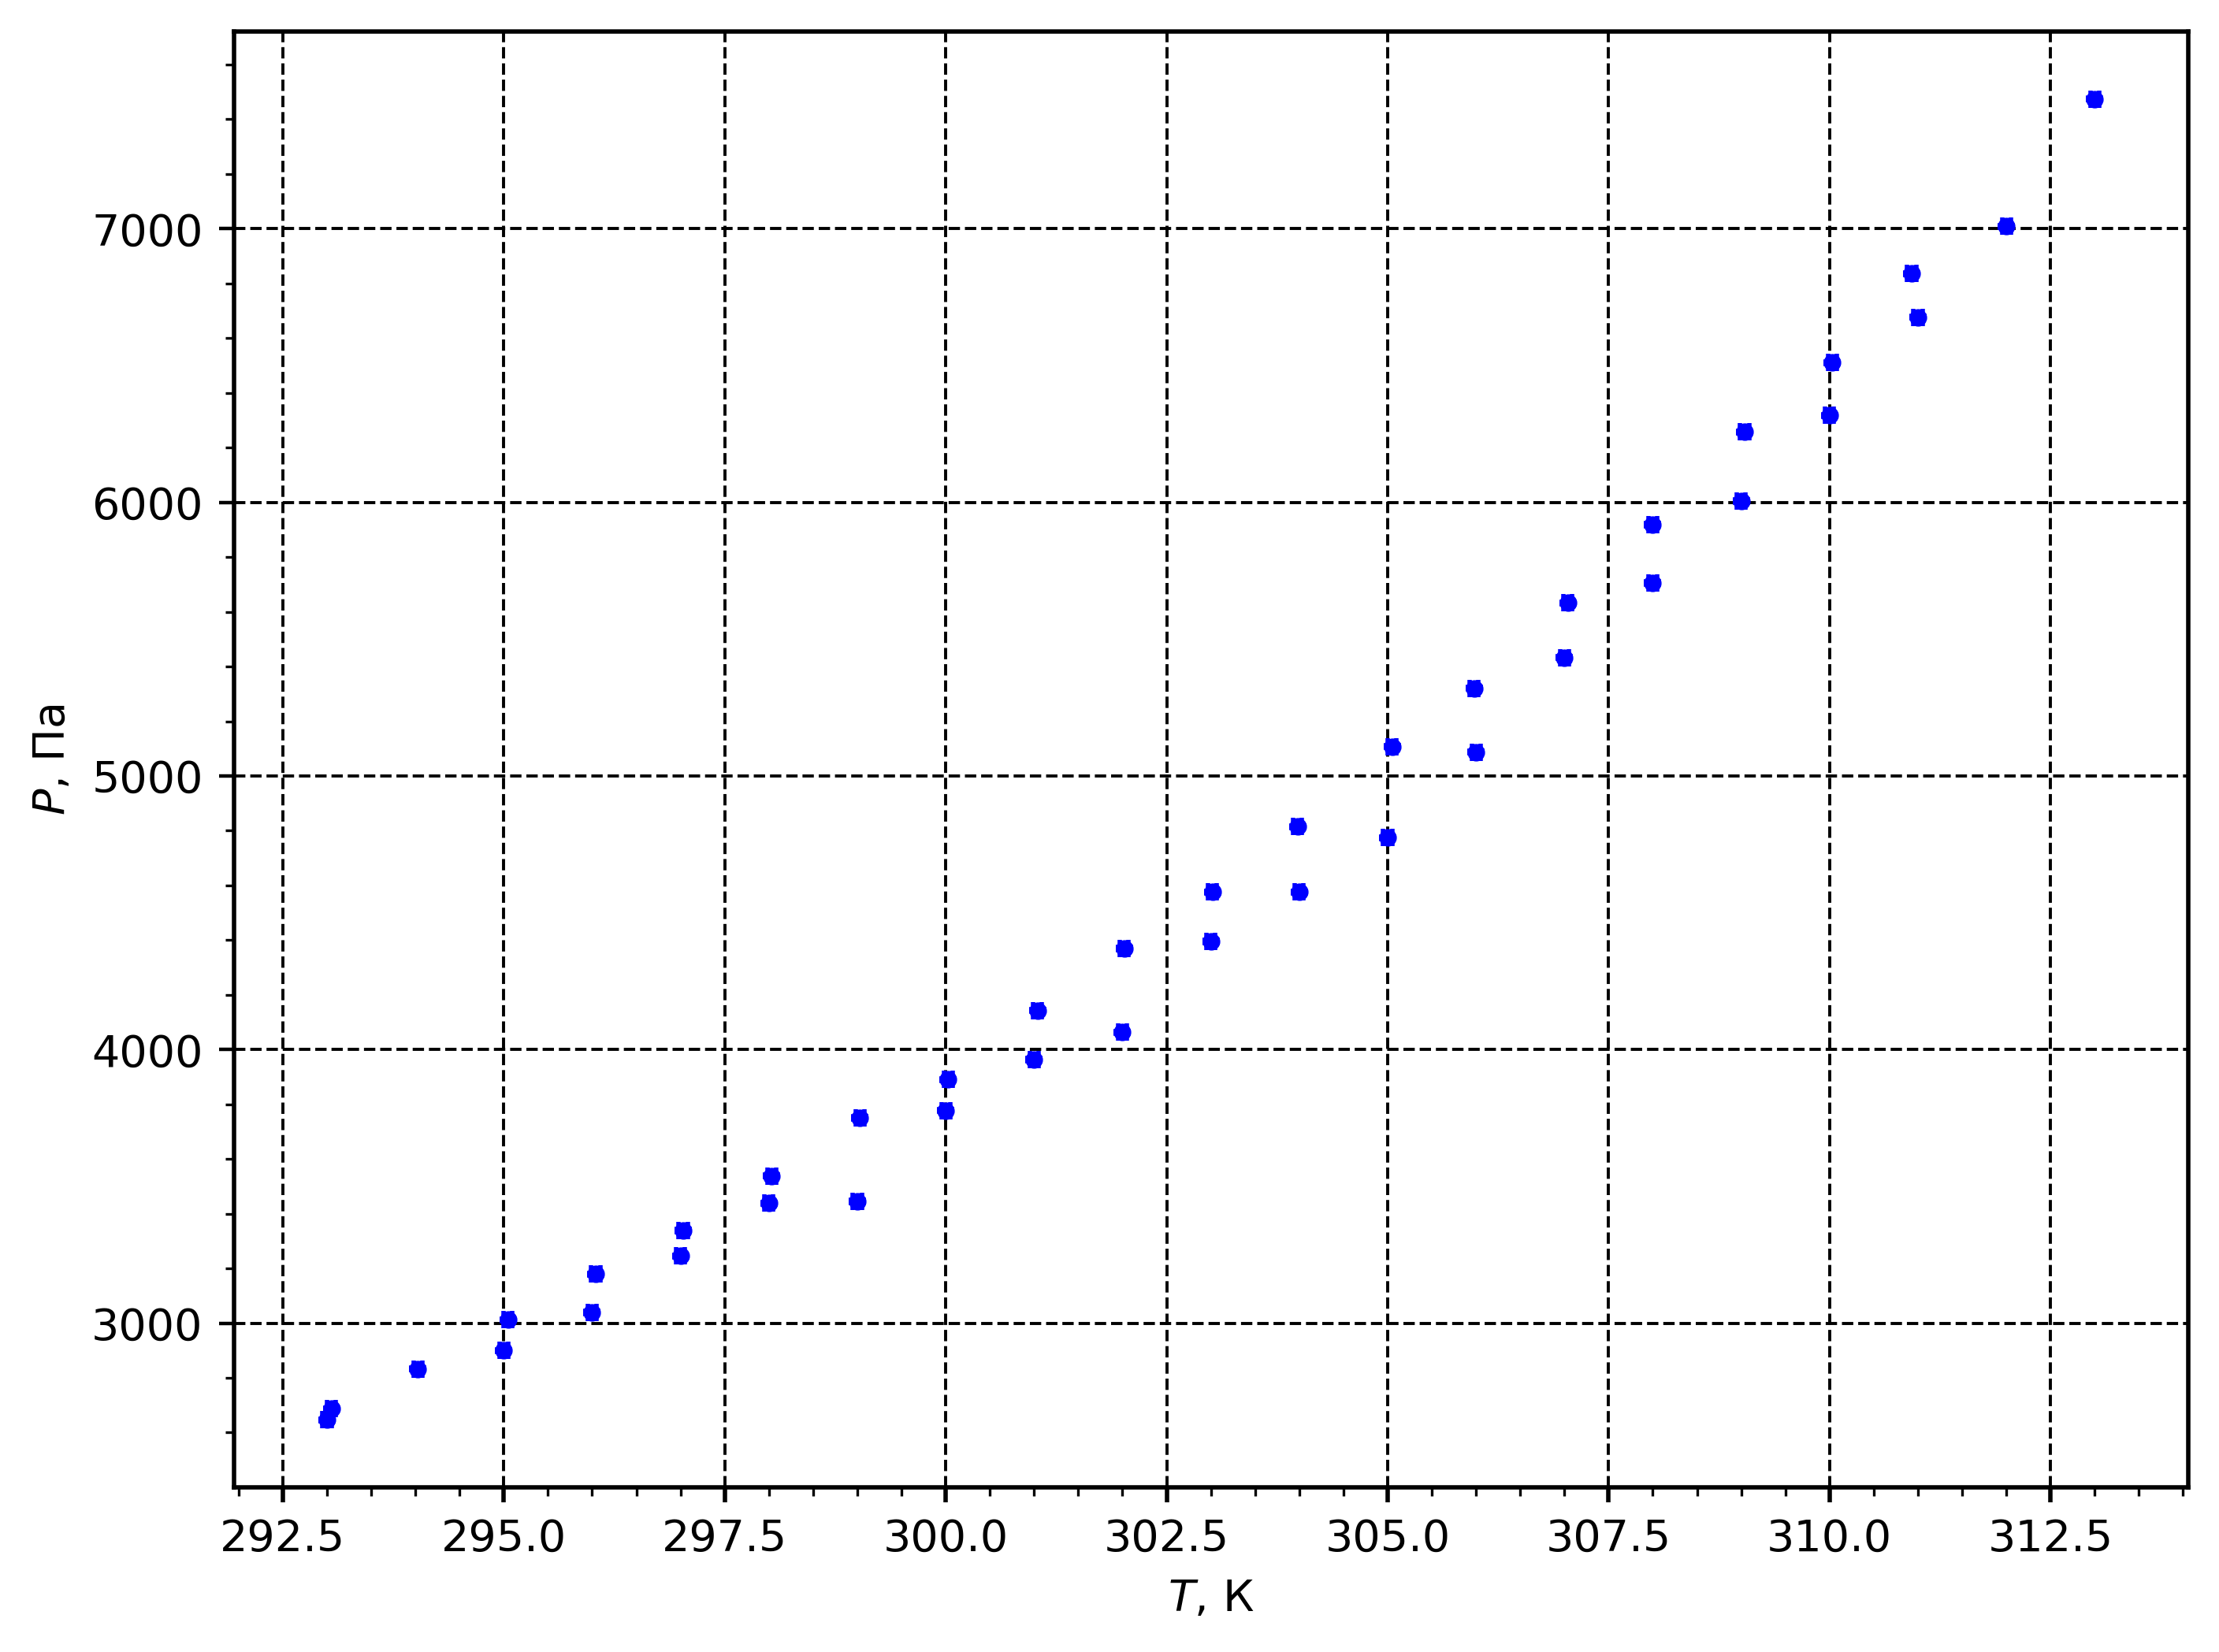

In [6]:
p1 = lab.plot.Plot(yl="$P$", xl="$T$")
p1.plot(data["T"], data["p"], fmt=".")

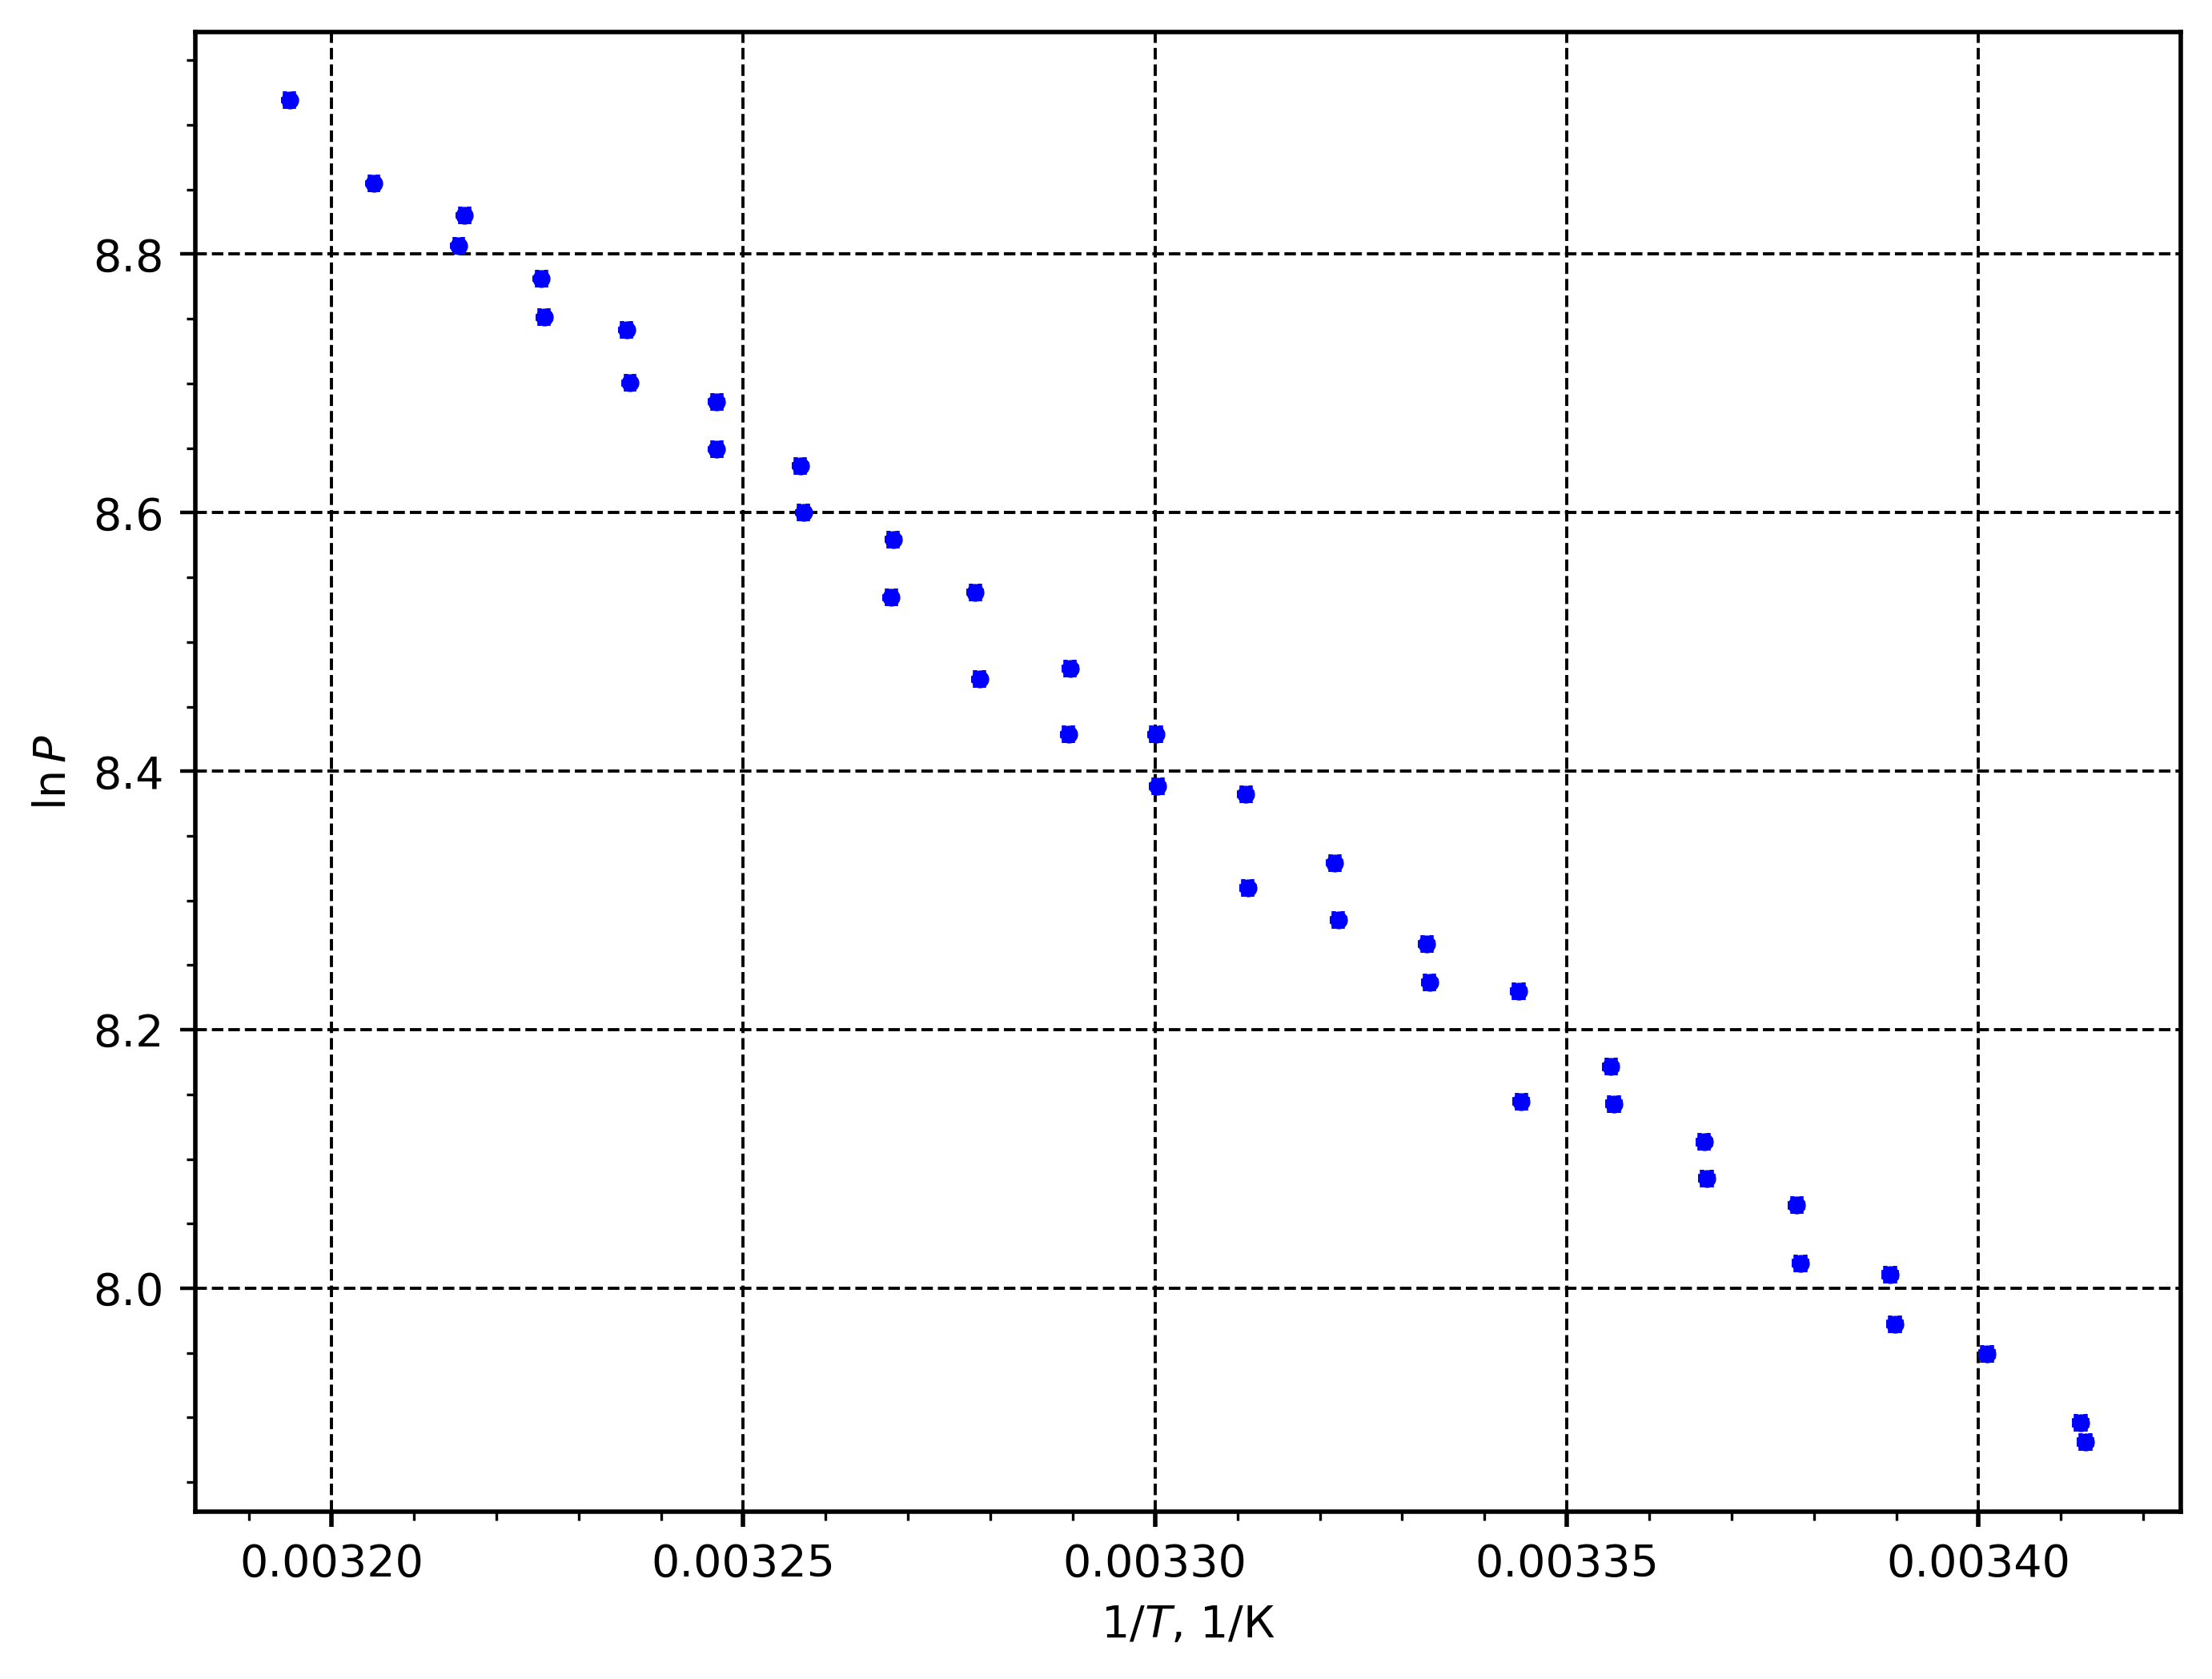

In [7]:
p2 = lab.plot.Plot(yl="$\\ln P$", xl="$1/T$")
p2.plot(data["1/T"], data["lnp"], fmt=".")

# Linear fit

In [8]:
k1, b1 = lf.chi2(data["T"], data["p"])
k2, b2 = lf.chi2(data["1/T"], data["lnp"])
print(f"k1 = {k1}\nk2 = {k2}")
print(f"b1 = {b1}\nb2 = {b2}")

k1 = 234+/-6 pascal / kelvin
k2 = (-4.76+/-0.06)e+03 kelvin
b1 = (-6.61+/-0.18)e+04 pascal
b2 = 24.13+/-0.20 dimensionless


# Plot lines and save

In [9]:
p1.line(k1, b1, color="black")
p1.save("../img/plot1.png")

In [10]:
p2.line(k2, b2, color="black")
p2.save("../img/plot2.png")

# Result

In [11]:
L1 = const.R * data["T"].arr.mean() ** 2 / data["p"].arr.mean() * k1
L2 = -const.R * k2
print(f"L1 = {L1}\nL2 = {L2}")

L1 = (3.86+/-0.10)e+04 joule / mole
L2 = (3.96+/-0.05)e+04 joule / mole


In [12]:
utils.totex(L1)
utils.totex(L2)

\left(3{,}86\pm0{,}10\right)\cdot 10^{4}\;\text{Дж} / \text{моль}
\left(3{,}96\pm0{,}05\right)\cdot 10^{4}\;\text{Дж} / \text{моль}


# Texify intermediate data

In [13]:
utils.totex(data, columns={
    "T": "T",
    "h1": "h_1",
    "h2": "h_2",
    "p": "P",
    "1/T": "T^{-1}",
    "lnp": "\ln P",
})

\begin{tabular}{|l|l|l|l|l|l|}
\hline
$T,\;\text{К}$ & $h_1,\;\text{см}$ & $h_2,\;\text{см}$ & $P,\;\text{Па}$ & $T^{-1},\;\text{К}^{-1}$ & $\ln P$\\\hline
$293{,}00\pm0{,}05$ & $5{,}1900\pm0{,}0025$ & $2{,}5800\pm0{,}0025$ & $2647\pm5$ & $\left(3{,}4130\pm0{,}0006\right)\cdot 10^{-3}$ & $7{,}8811\pm0{,}0018$\\\hline
$295{,}00\pm0{,}05$ & $5{,}3000\pm0{,}0025$ & $2{,}5000\pm0{,}0025$ & $2899\pm5$ & $\left(3{,}3898\pm0{,}0006\right)\cdot 10^{-3}$ & $7{,}9723\pm0{,}0017$\\\hline
$296{,}00\pm0{,}05$ & $5{,}3450\pm0{,}0025$ & $2{,}4400\pm0{,}0025$ & $3039\pm5$ & $\left(3{,}3784\pm0{,}0006\right)\cdot 10^{-3}$ & $8{,}0193\pm0{,}0016$\\\hline
$297{,}00\pm0{,}05$ & $5{,}4200\pm0{,}0025$ & $2{,}3600\pm0{,}0025$ & $3245\pm5$ & $\left(3{,}3670\pm0{,}0006\right)\cdot 10^{-3}$ & $8{,}0850\pm0{,}0015$\\\hline
$298{,}00\pm0{,}05$ & $5{,}5000\pm0{,}0025$ & $2{,}2950\pm0{,}0025$ & $3438\pm5$ & $\left(3{,}3557\pm0{,}0006\right)\cdot 10^{-3}$ & $8{,}1427\pm0{,}0014$\\\hline
$299{,}00\pm0{,}05$ & $5{,}55